## Sales Analysis Tool: Prediction Example

In [22]:
import pandas as pd  
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas_profiling
%matplotlib inline 

from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA 


In [2]:
data_1 = pd.read_csv(r"C:\Users\wanji\Desktop\Sales tool 2\Sales-Tool-Analysis2\Datasets\TrainingData.csv")
data_1


,Period,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,2016 - Period:1,504.784933,NaN,NaN,37148.2,2045.282,NaN,NaN,NaN,NaN,...,NaN,NaN,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563
1,2016 - Period:2,490.226477,NaN,NaN,50886.8,2370.584,0.000014,0.000015,NaN,NaN,...,NaN,NaN,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301
2,2016 - Period:3,479.244686,NaN,NaN,253333.2,3180.888,0.000016,0.000017,NaN,NaN,...,NaN,NaN,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115
3,2016 - Period:4,489.057428,NaN,NaN,3426239.0,13595.398,0.000016,0.000019,NaN,NaN,...,NaN,NaN,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246
4,2016 - Period:5,477.031994,NaN,NaN,552197.8,3983.134,0.000016,0.000019,NaN,NaN,...,31.702433,25.3,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data_2 = pd.read_csv(r"C:\Users\wanji\Desktop\Sales tool 2\Sales-Tool-Analysis2\Datasets\TestData.csv")
data_2

,Period,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,2017 - Period:1,392.326431,1314877.0,7398.658606,NaN,NaN,1.666660e-05,0.000020,NaN,NaN,...,NaN,NaN,98.351850,35.773009,42.782645,65.403281,1696093.627,312550.9088,0.384183,40.624048
1,2017 - Period:6,300.922056,21830378.8,98309.553500,7324082.2,111398.20310,1.059535e+07,239751.406700,1.306122e+08,1.361008e+05,...,39.492174,32.1,116.098715,37.773410,53.149560,76.896817,2674460.512,818710.9650,0.024751,49.735737
2,2018 - Period:1,247.315476,2829923.6,9938.170001,NaN,NaN,1.484088e+04,1618.587524,NaN,NaN,...,NaN,NaN,107.289052,39.953699,49.153589,65.064755,1645094.597,320624.4770,0.313571,42.670532
3,2018 - Period:6,278.317524,15378465.6,58338.893120,5454810.0,74906.49837,1.519706e+02,50.580880,NaN,NaN,...,NaN,NaN,90.388998,34.106909,41.091068,58.301021,2715526.999,798281.1536,0.078074,38.517608
4,2018 - Period:11,161.529279,285755.2,5232.968000,63120.8,NaN,1.929363e+06,24347.693170,1.693330e+09,2.115462e+06,...,NaN,NaN,100.734978,37.813696,45.792891,65.671466,1628818.628,329510.9938,0.006405,40.955281


###  Merge the datasets together

In [4]:
sales_data = pd.concat([data_1, data_2])
sales_data

,Period,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,2016 - Period:1,504.784933,NaN,NaN,37148.2,2045.28200,NaN,NaN,NaN,NaN,...,NaN,NaN,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563
1,2016 - Period:2,490.226477,NaN,NaN,50886.8,2370.58400,1.400000e-05,0.000015,NaN,NaN,...,NaN,NaN,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301
2,2016 - Period:3,479.244686,NaN,NaN,253333.2,3180.88800,1.560000e-05,0.000017,NaN,NaN,...,NaN,NaN,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115
3,2016 - Period:4,489.057428,NaN,NaN,3426239.0,13595.39800,1.624000e-05,0.000019,NaN,NaN,...,NaN,NaN,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246
4,2016 - Period:5,477.031994,NaN,NaN,552197.8,3983.13400,1.649600e-05,0.000019,NaN,NaN,...,31.702433,25.3,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2017 - Period:1,392.326431,1314877.0,7398.658606,NaN,NaN,1.666660e-05,0.000020,NaN,NaN,...,NaN,NaN,98.351850,35.773009,42.782645,65.403281,1696093.627,312550.9088,0.384183,40.624048
1,2017 - Period:6,300.922056,21830378.8,98309.553500,7324082.2,111398.20310,1.059535e+07,239751.406700,1.306122e+08,1.361008e+05,...,39.492174,32.1,116.098715,37.773410,53.149560,76.896817,2674460.512,818710.9650,0.024751,49.735737
2,2018 - Period:1,247.315476,2829923.6,9938.170001,NaN,NaN,1.484088e+04,1618.587524,NaN,NaN,...,NaN,NaN,107.289052,39.953699,49.153589,65.064755,1645094.597,320624.4770,0.313571,42.670532
3,2018 - Period:6,278.317524,15378465.6,58338.893120,5454810.0,74906.49837,1.519706e+02,50.580880,NaN,NaN,...,NaN,NaN,90.388998,34.106909,41.091068,58.301021,2715526.999,798281.1536,0.078074,38.517608


In [5]:
sales_data.reset_index(drop = True, inplace = True)
sales_data

,Period,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,2016 - Period:1,504.784933,NaN,NaN,37148.2,2045.28200,NaN,NaN,NaN,NaN,...,NaN,NaN,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563
1,2016 - Period:2,490.226477,NaN,NaN,50886.8,2370.58400,1.400000e-05,0.000015,NaN,NaN,...,NaN,NaN,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301
2,2016 - Period:3,479.244686,NaN,NaN,253333.2,3180.88800,1.560000e-05,0.000017,NaN,NaN,...,NaN,NaN,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115
3,2016 - Period:4,489.057428,NaN,NaN,3426239.0,13595.39800,1.624000e-05,0.000019,NaN,NaN,...,NaN,NaN,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246
4,2016 - Period:5,477.031994,NaN,NaN,552197.8,3983.13400,1.649600e-05,0.000019,NaN,NaN,...,31.702433,25.3,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,2017 - Period:1,392.326431,1314877.0,7398.658606,NaN,NaN,1.666660e-05,0.000020,NaN,NaN,...,NaN,NaN,98.351850,35.773009,42.782645,65.403281,1696093.627,312550.9088,0.384183,40.624048
1000,2017 - Period:6,300.922056,21830378.8,98309.553500,7324082.2,111398.20310,1.059535e+07,239751.406700,1.306122e+08,1.361008e+05,...,39.492174,32.1,116.098715,37.773410,53.149560,76.896817,2674460.512,818710.9650,0.024751,49.735737
1001,2018 - Period:1,247.315476,2829923.6,9938.170001,NaN,NaN,1.484088e+04,1618.587524,NaN,NaN,...,NaN,NaN,107.289052,39.953699,49.153589,65.064755,1645094.597,320624.4770,0.313571,42.670532
1002,2018 - Period:6,278.317524,15378465.6,58338.893120,5454810.0,74906.49837,1.519706e+02,50.580880,NaN,NaN,...,NaN,NaN,90.388998,34.106909,41.091068,58.301021,2715526.999,798281.1536,0.078074,38.517608


### Dataset Info

In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Period                              39 non-null     object 
 1   EQ                                  39 non-null     float64
 2   Social_Search_Impressions           29 non-null     float64
 3   Social_Search_Working_cost          29 non-null     float64
 4   Digital_Impressions                 26 non-null     float64
 5   Digital_Working_cost                25 non-null     float64
 6   Print_Impressions.Ads40             38 non-null     float64
 7   Print_Working_Cost.Ads50            38 non-null     float64
 8   OOH_Impressions                     12 non-null     float64
 9   OOH_Working_Cost                    9 non-null      float64
 10  SOS_pct                             39 non-null     float64
 11  Digital_Impressions_pct             13 non-

## Pandas Profiling

In [7]:
profile = pandas_profiling.ProfileReport(sales_data)
profile.to_file("data_profile_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]


### Shape of the dataset: Determine rows and columns

In [8]:
# Shape of the data frame
sales_data.shape

(1004, 39)

#### Statistics of the dataframe: Mean, Standard Deviation, count

In [9]:
# Dataframe statistics 
sales_data.describe()

,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
count,39.000000,2.900000e+01,29.000000,2.600000e+01,25.000000,3.800000e+01,38.000000,1.200000e+01,9.000000e+00,39.000000,...,13.000000,13.000000,39.000000,39.000000,39.000000,39.000000,3.900000e+01,39.000000,39.000000,39.000000
mean,317.607462,1.161039e+07,49178.994255,3.885468e+06,46622.923906,2.074375e+06,35042.988209,9.795517e+08,2.740892e+06,11.439476,...,45.554208,32.015385,102.200774,38.646238,44.691582,65.408013,2.111044e+06,494376.637197,0.108772,42.356404
std,117.566092,1.007712e+07,42213.012907,4.080377e+06,48093.264449,3.711857e+06,62774.261818,1.214696e+09,3.041384e+06,11.340795,...,22.528613,16.372581,8.788492,4.933611,3.261620,4.768028,4.099681e+05,198096.696379,0.109919,3.060174
min,130.937361,2.160000e+04,2006.674000,2.989220e+04,1800.344000,1.400000e-05,0.000015,2.880720e+04,3.505506e+02,0.102858,...,7.080951,2.200000,83.883480,32.368993,38.550768,57.583497,1.504339e+06,249237.493500,0.001659,35.480731
25%,238.472603,3.180503e+06,19605.934000,3.280494e+05,7591.644000,1.666610e-05,0.000020,2.293069e+07,1.361008e+05,0.989926,...,32.195566,25.300000,97.092027,35.718011,41.881951,62.430457,1.774046e+06,333269.460000,0.027591,40.485839
50%,286.705586,9.662477e+06,34039.140500,3.033369e+06,31259.415900,4.155446e+03,606.970334,9.681104e+07,2.115462e+06,9.209103,...,40.158646,34.100000,100.734978,37.377758,44.631443,65.324834,2.010362e+06,421134.368800,0.078074,42.776921
75%,388.932161,1.679130e+07,80510.769450,5.984218e+06,70004.655540,1.809349e+06,42995.889755,1.921976e+09,5.076809e+06,17.300709,...,54.359634,44.700000,106.348210,40.034473,45.924004,67.668061,2.422064e+06,637651.872200,0.143282,44.000818
max,546.053084,4.039739e+07,153276.592000,1.830051e+07,170507.762800,1.205852e+07,239751.406700,3.119656e+09,8.617309e+06,47.442188,...,100.000000,54.600000,121.889647,57.797794,53.149560,76.896817,2.867307e+06,856242.939400,0.430051,49.735737


## Data Munging/Cleaning

In [10]:
# Identify sum of duplicate values in the data frame
sales_data.duplicated().sum()

964

In [11]:
# Drop the duplicates
sales_data.drop_duplicates(inplace = True)

In [12]:
#Confirm if the duplicated values have been removed 
sales_data.duplicated().sum()

0

In [13]:
# Function to Identify missing values and % threshold of the missing values in the data frame 
def missing_values_percentage(sales_data):
    missing_percentage = (sales_data.isnull().sum() / len(sales_data)) * 100
    return missing_percentage 

missing_percentage_per_column = missing_values_percentage(sales_data)
print("Missing values percentage per column:")
print(missing_percentage_per_column)

Missing values percentage per column:
Period                                 2.5
EQ                                     2.5
Social_Search_Impressions             27.5
Social_Search_Working_cost            27.5
Digital_Impressions                   35.0
Digital_Working_cost                  37.5
Print_Impressions.Ads40                5.0
Print_Working_Cost.Ads50               5.0
OOH_Impressions                       70.0
OOH_Working_Cost                      77.5
SOS_pct                                2.5
Digital_Impressions_pct               67.5
CCFOT                                  2.5
Median_Temp                            2.5
Median_Rainfall                        2.5
Fuel_Price                             2.5
Inflation                              2.5
Trade_Invest                           2.5
Brand_Equity                           2.5
Avg_EQ_Price                           2.5
Any_Promo_pct_ACV                      2.5
Any_Feat_pct_ACV                      70.0
Any_Disp_pct_ACV

In [14]:
# We can drop the missing values/impute them depending on the percentage values of the threshold

# Define threshold for dropping the missing values
drop_threshold = 60

# Define threshold for imputing the missing values
impute_threshold = 20

# Handle columns with high missing percentage (Drop)
columns_to_drop = missing_percentage_per_column[missing_percentage_per_column > drop_threshold].index
columns_to_drop = [col for col in columns_to_drop if col in sales_data.columns]  # Check if columns exist
sales_data.drop(columns=columns_to_drop, inplace=True)

# Handle columns with moderate missing percentage (Impute)
columns_to_impute = missing_percentage_per_column[(missing_percentage_per_column <= impute_threshold) & (missing_percentage_per_column > 0)].index
for col in columns_to_impute:
    # Check if the column contains numeric data
    if sales_data[col].dtype != 'object':
        sales_data[col].fillna(sales_data[col].mean(), inplace=True)

print(sales_data)


                Period          EQ  Social_Search_Impressions  \
0      2016 - Period:1  504.784933                        NaN   
1      2016 - Period:2  490.226477                        NaN   
2      2016 - Period:3  479.244686                        NaN   
3      2016 - Period:4  489.057428                        NaN   
4      2016 - Period:5  477.031994                        NaN   
5      2016 - Period:6  487.855299                        NaN   
6      2016 - Period:7  466.399281                        NaN   
7      2016 - Period:8  546.053084                        NaN   
8      2016 - Period:9  464.925607                        NaN   
9     2016 - Period:10  357.648693                  3919100.6   
10    2016 - Period:11  298.553287                 25075933.0   
11    2016 - Period:12  283.797430                  9662476.8   
12    2016 - Period:13  239.231622                    21600.0   
13     2017 - Period:2  355.652264                  5830766.8   
14     2017 - Period:3  2

In [15]:
# Function to Identify missing values and % threshold of the missing values in the data frame 
def missing_values_percentage(sales_data):
    missing_percentage = (sales_data.isnull().sum() / len(sales_data)) * 100
    return missing_percentage 

missing_percentage_per_column = missing_values_percentage(sales_data)
print("Missing values percentage per column:")
print(missing_percentage_per_column)

Missing values percentage per column:
Period                                 2.5
EQ                                     0.0
Social_Search_Impressions             27.5
Social_Search_Working_cost            27.5
Digital_Impressions                   35.0
Digital_Working_cost                  37.5
Print_Impressions.Ads40                0.0
Print_Working_Cost.Ads50               0.0
SOS_pct                                0.0
CCFOT                                  0.0
Median_Temp                            0.0
Median_Rainfall                        0.0
Fuel_Price                             0.0
Inflation                              0.0
Trade_Invest                           0.0
Brand_Equity                           0.0
Avg_EQ_Price                           0.0
Any_Promo_pct_ACV                      0.0
Any_Disp_pct_ACV                      37.5
EQ_Base_Price                          0.0
Est_ACV_Selling                        0.0
pct_ACV                                0.0
Avg_no_of_Items 

In [16]:
# Impute missing values in numeric columns with mean
numeric_cols = ['Social_Search_Impressions', 'Digital_Impressions', 'Digital_Working_cost', 'Any_Disp_pct_ACV','Social_Search_Working_cost']
for col in numeric_cols:
    sales_data[col].fillna(sales_data[col].mean(), inplace=True)



In [17]:
#Confirm if there are still more missing values
sales_data.isnull().sum()

Period                                1
EQ                                    0
Social_Search_Impressions             0
Social_Search_Working_cost            0
Digital_Impressions                   0
Digital_Working_cost                  0
Print_Impressions.Ads40               0
Print_Working_Cost.Ads50              0
SOS_pct                               0
CCFOT                                 0
Median_Temp                           0
Median_Rainfall                       0
Fuel_Price                            0
Inflation                             0
Trade_Invest                          0
Brand_Equity                          0
Avg_EQ_Price                          0
Any_Promo_pct_ACV                     0
Any_Disp_pct_ACV                      0
EQ_Base_Price                         0
Est_ACV_Selling                       0
pct_ACV                               0
Avg_no_of_Items                       0
pct_PromoMarketDollars_Category       0
RPI_Category                          0


In [19]:
sales_data.dropna(subset=['Period'], inplace = True)


In [20]:
# Convert the 'Period' column 
sales_data['Period'] = sales_data['Period'].str.extract('(\d+)').astype(int)

## 2. EDA

#### EQ Distribution



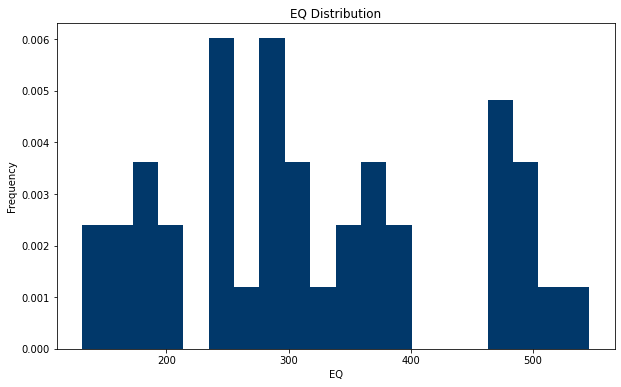

In [ ]:

# Plot the Histogram
plt.figure(figsize=(10,6))
plt.hist(eq_values_flat, color='#01386a', bins=20, density=True)
plt.title('EQ Distribution')
plt.xlabel('EQ')
plt.ylabel('Frequency')
plt.show()




#### Bar Chart to show 'Period' vs 'EQ'

<ipython-input-58-ba367997365d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Period', y='EQ', data=sales_data, palette='viridis')


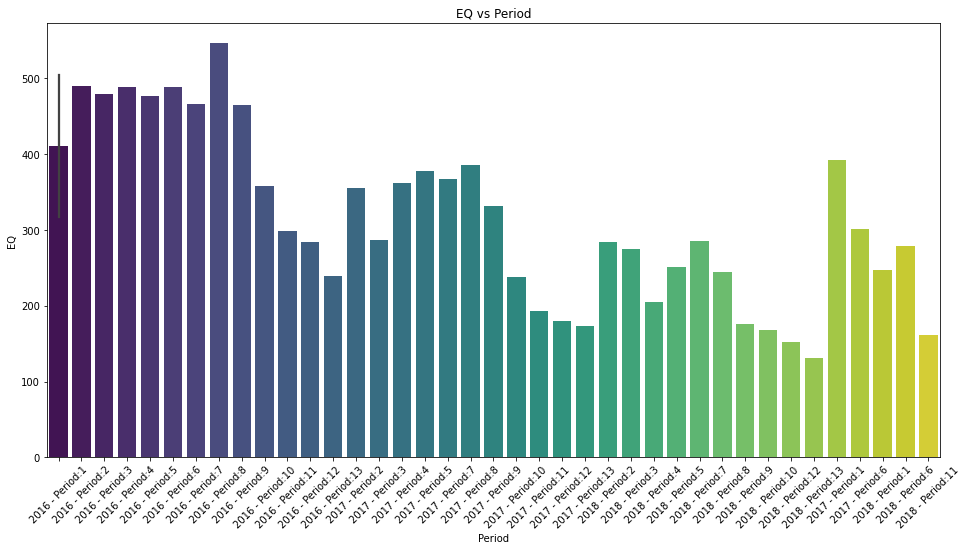

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(x='Period', y='EQ', data=sales_data, palette='viridis')
plt.title('EQ vs Period')
plt.xlabel('Period')
plt.ylabel('EQ')
plt.xticks(rotation=45)
plt.show()


### Pie Chart for 'SOS_pct'

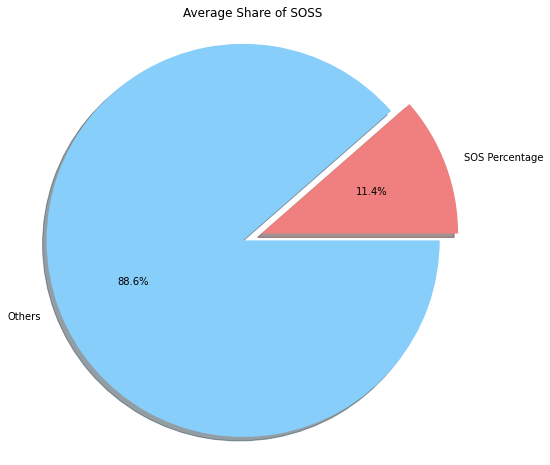

In [ ]:
labels = 'SOS Percentage', 'Others'
sizes = [sales_data['SOS_pct'].mean(), 100 - sales_data['SOS_pct'].mean()]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1,0)

# Plot the piechart 
plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title("Average Share of SOSS")
plt.axis('equal')
plt.show()

<ipython-input-65-efcdcbf36c7b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Period', y='Digital_Working_cost', data=sales_data, palette='rocket')


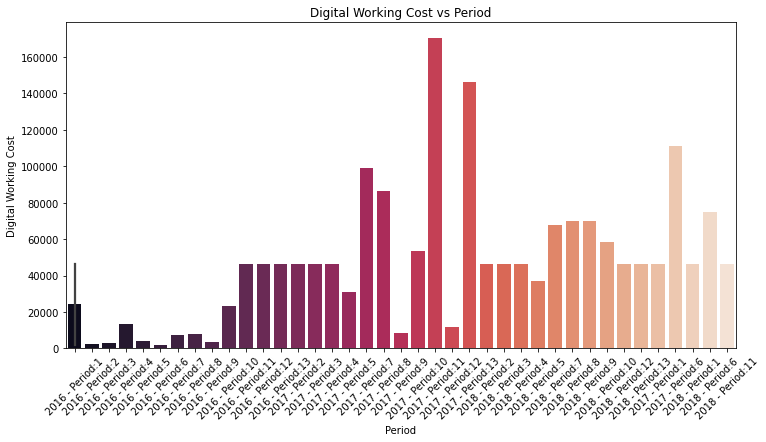

In [ ]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Period', y='Digital_Working_cost', data=sales_data, palette='rocket')
plt.title('Digital Working Cost vs Period')
plt.xlabel('Period')
plt.ylabel('Digital Working Cost')
plt.xticks(rotation=45)
plt.show()


### Correlation Analysis

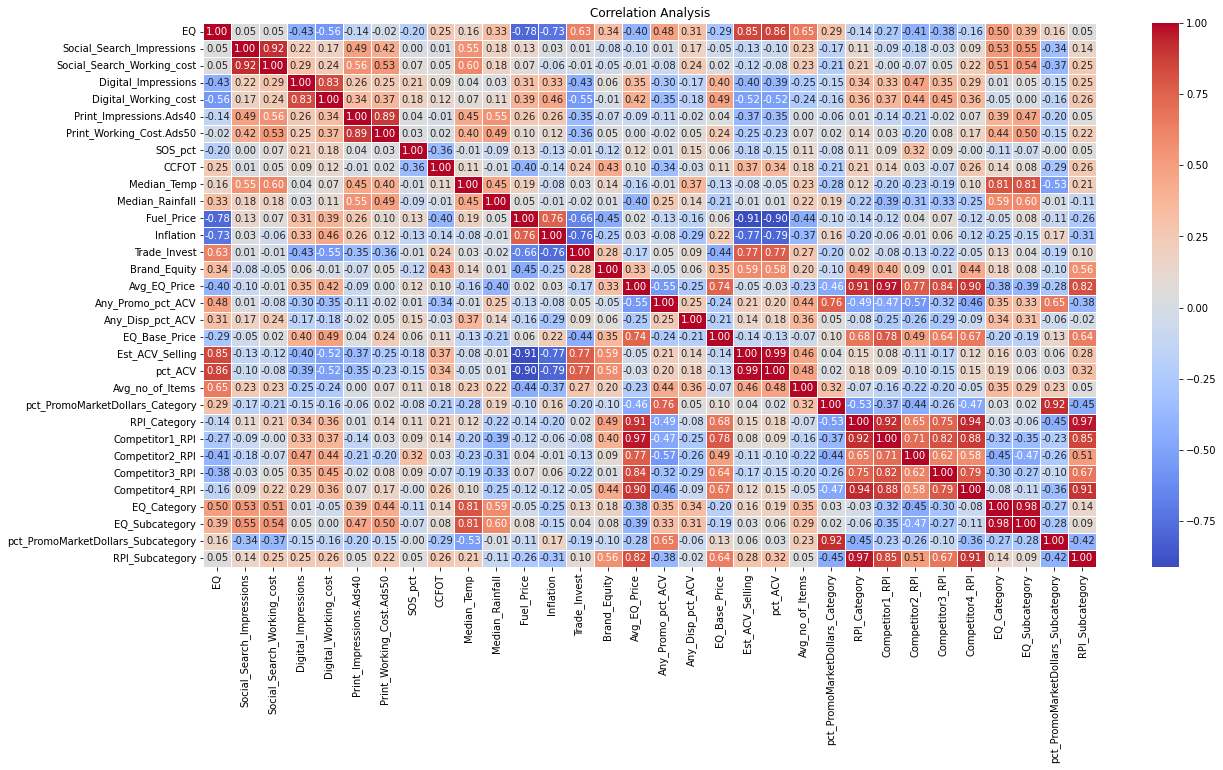

In [ ]:
numeric_columns = sales_data.select_dtypes(include=np.number)
correlation_matrix = numeric_columns.corr()
# correlation_matrix= sales_data.corr()

# Visualize the correlation using a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot = True,cmap = 'coolwarm', fmt = ".2f", linewidths = .5)
plt.title("Correlation Analysis")
plt.show()

## Feature Engineering 
* Coming up with Features that help in running the model effiecienly 
* Features to give a much better insight to the data 

In [ ]:
# We can bin the 'EQ' column and create a new column 'EQ_Binned'
sales_data['EQ_Binned'] = pd.cut(sales_data['EQ'], bins = 5, labels= False)

In [ ]:
# Identify the Ctaegorical Columns first before onehot encoding 
categorical_columns = sales_data.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Period'], dtype='object')

In [ ]:
# One hot Encoding
encoded_data = pd.get_dummies(sales_data, columns=['Period'])

In [ ]:
numeric_data = sales_data.select_dtypes(include = np.number)
# Identify Polynomial fetaures 
poly = PolynomialFeatures(degree = 2)
poly_features = poly.fit_transform(numeric_data)

In [21]:
# Try Scaling for the dataset
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(sales_data)

## Data Transformation

In [ ]:
)